In [1]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt


trainData = pd.read_csv('./train.csv')
trainData = trainData.drop('Cabin',1)

testData = pd.read_csv('./test.csv')

trainData.loc[trainData["Sex"] == "male", "Sex"] = 0
trainData.loc[trainData["Sex"] == "female", "Sex"] = 1

embar = pd.DataFrame(0, index=xrange(len(trainData)), columns=['Embarked']) ## 0 indicates embarked 
##C (i want the two)
### missing values get embarked C which associates with a larger fraction of survival
for ii in xrange(len(trainData)):
    if (trainData.Embarked[ii]=='S'):
        embar.Embarked[ii] = 1
    else:
        if (trainData.Embarked[ii]=='Q'): 
            embar.Embarked[ii] = 2


nan_rows = trainData[trainData.isnull().T.any().T]
nan_rows

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
5,6,0,3,"Moran, Mr. James",0,NaN,0,0,330877,8.4583,Q
17,18,1,2,"Williams, Mr. Charles Eugene",0,NaN,0,0,244373,13.0000,S
19,20,1,3,"Masselmani, Mrs. Fatima",1,NaN,0,0,2649,7.2250,C
26,27,0,3,"Emir, Mr. Farred Chehab",0,NaN,0,0,2631,7.2250,C
28,29,1,3,"O'Dwyer, Miss. Ellen ""Nellie""",1,NaN,0,0,330959,7.8792,Q
29,30,0,3,"Todoroff, Mr. Lalio",0,NaN,0,0,349216,7.8958,S
31,32,1,1,"Spencer, Mrs. William Augustus (Marie Eugenie)",1,NaN,1,0,PC 17569,146.5208,C
32,33,1,3,"Glynn, Miss. Mary Agatha",1,NaN,0,0,335677,7.7500,Q
36,37,1,3,"Mamee, Mr. Hanna",0,NaN,0,0,2677,7.2292,C
42,43,0,3,"Kraeff, Mr. Theodor",0,NaN,0,0,349253,7.8958,C


In [2]:
import re
# A function to get the title from a name.
def get_title(name):
    # Use a regular expression to search for a title.
    title_search = re.search(' ([A-Za-z]+)\.', name)
    # If the title exists, extract and return it.
    if title_search:
        return title_search.group(1)
    return ""

# Get all the titles and print how often each one appear.
titles = trainData["Name"].apply(get_title)
print(pd.value_counts(titles))

Mr          517
Miss        182
Mrs         125
Master       40
Dr            7
Rev           6
Col           2
Major         2
Mlle          2
Countess      1
Ms            1
Lady          1
Jonkheer      1
Don           1
Mme           1
Capt          1
Sir           1
Name: Name, dtype: int64


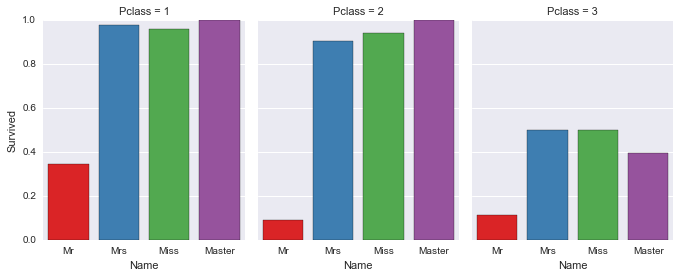

In [3]:
trainData.Name=titles
dfNew = trainData[(titles=='Master')|(titles=='Miss')|(titles=='Mr')|(titles=='Mrs')]

import seaborn as sns
g = sns.factorplot(x="Name", y="Survived", col="Pclass", data=dfNew, saturation=.9,
                    kind="bar", ci=None, aspect=.8, palette="Set1")



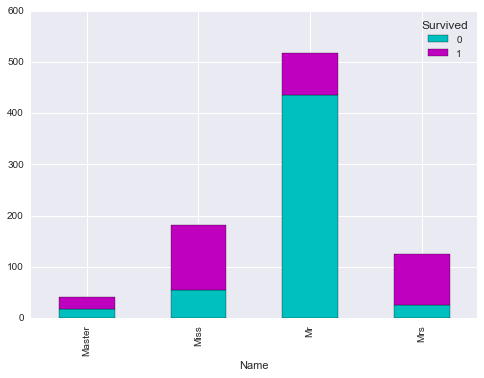

In [4]:
dat = dfNew.groupby(['Name']).Survived.value_counts()
dat.unstack().plot(kind='bar',stacked=True,color=['c','m'])

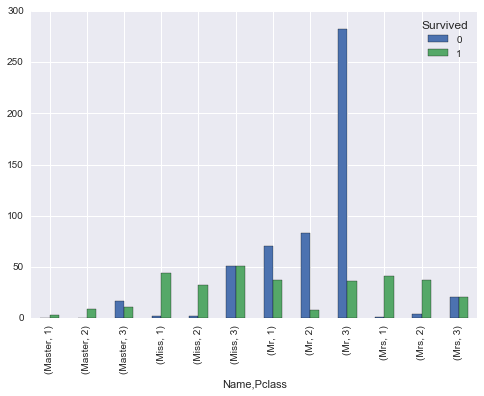

In [5]:
dat=dfNew.groupby(['Name','Pclass']).Survived.value_counts()
dat.unstack().plot(kind='bar')

In [6]:
## Group the other titles into the other 4
trainData.Name[(titles=='Capt')|(titles=='Don')|(titles=='Rev')|(titles=='Jonkheer')|(titles=='Dr')]='Mr'
trainData.Name[(titles=='Major')|(titles=='Col')|(titles=='Sir')]='Master'
trainData.Name[(titles=='Ms')|(titles=='Lady')|(titles=='Mme')|(titles=='Mlle')|(titles=='Countess')]='Mrs'

C:\Users\Saina\Anaconda2\lib\site-packages\ipykernel\__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app
C:\Users\Saina\Anaconda2\lib\site-packages\ipykernel\__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()
C:\Users\Saina\Anaconda2\lib\site-packages\ipykernel\__main__.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [80]:
set(trainData.Name)

{'Master', 'Miss', 'Mr', 'Mrs'}

In [7]:
## preparing train data
family = pd.DataFrame(0, index=xrange(len(trainData)), columns=['Family'])
for ii in xrange(len(trainData)):
    if ((trainData.SibSp[ii]+trainData.Parch[ii])>0): 
        family.Family[ii]=1

In [ ]:
g = sns.factorplot(x="Name", y="Survived", col="Pclass", data=dfNew, saturation=.9,
                    kind="bar", ci=None, aspect=.8, palette="Set1")
